## Statistical Learning Assignment

In [174]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import researchpy as rp

In [175]:
df = pd.read_csv('responses.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [176]:
df_sub = df[['Finances', 'Gender', 'Village - town', 'Healthy eating']]
df_sub.head()

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,village,4.0
1,3.0,female,city,3.0
2,2.0,female,city,3.0
3,2.0,female,city,3.0
4,4.0,female,village,4.0


### Data Exploration

In [177]:
df_sub.describe()

,Finances,Healthy eating
count,1007.000000,1007.000000
mean,3.023833,3.031778
std,1.144365,0.936865
min,1.000000,1.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E9BC7B6A0>,
      dtype=object)

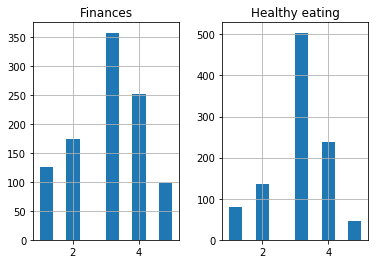

In [178]:
df_sub.hist()

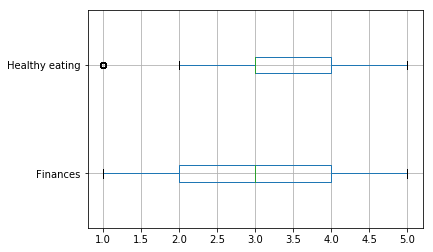

In [179]:
df_sub.boxplot(vert=False)

In [180]:
df_sub['Healthy eating'].value_counts()

3.0    504
4.0    239
2.0    137
1.0     81
5.0     46
Name: Healthy eating, dtype: int64

In [181]:
df_sub['Finances'].value_counts()

3.0    358
4.0    252
2.0    174
1.0    125
5.0     98
Name: Finances, dtype: int64

In [182]:
# Check if there are missing values
df_sub.isna().sum()

Finances          3
Gender            6
Village - town    4
Healthy eating    3
dtype: int64

In [183]:
# Get mode of all columns
mode = df_sub.mode()
mode_s = mode.iloc[0,:]
mode

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,city,3.0


In [184]:
# Fill missing values with Mode
df_sub.fillna(mode_s, inplace=True)
df_sub.isna().sum()

C:\Users\rswai\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Finances          0
Gender            0
Village - town    0
Healthy eating    0
dtype: int64

#### From the above plots and description, we infer that
#### 1. Finances and Healthy eating are close to normal distribution.
#### 2. There were a few missing values which have been handled by imputation.

### Problem 1 - Is saving money (finances) gender dependant?

In [185]:
print('Null Hypothesis : Saving money is not gender dependent')
print('Alternate Hypothesis : Saving money is gender dependent')

Null Hypothesis : Saving money is not gender dependent
Alternate Hypothesis : Saving money is gender dependent


In [186]:
# Perform Chi - Square Test for test of independence
table, results = rp.crosstab(df_sub['Gender'], df_sub['Finances'], prop= 'col', test= 'chi-square')  
table

Finances                                        
            1.0     2.0     3.0     4.0     5.0     All
Gender                                                 
female     52.0   56.32   61.77   59.52   64.29   59.31
male       48.0   43.68   38.23   40.48   35.71   40.69
All       100.0  100.00  100.00  100.00  100.00  100.00

In [187]:
results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,5.3289
1,p-value =,0.2552
2,Cramer's V =,0.0726


In [188]:
print("As the p-value 0.2552 is greater than 0.05, we fail to reject null hypothesis and hence, infer that Saving Money is not Gender dependent")

As the p-value 0.2552 is greater than 0.05, we fail to reject null hypothesis and hence, infer that Saving Money is not Gender dependent


### Problem 2 - Is there any differences in money saving (finances) between people from city or village?

In [189]:
print('Null Hypothesis : Saving money is independent of where people are from (city or village)')
print('Alternate Hypothesis : Saving money is dependent on where people are from (city or village)')

Null Hypothesis : Saving money is independent of where people are from (city or village)
Alternate Hypothesis : Saving money is dependent on where people are from (city or village)


In [190]:
# Perform Chi - Square Test for test of independence
table, results = rp.crosstab(df_sub['Village - town'], df_sub['Finances'], prop= 'col', test= 'chi-square')  
table

Finances                                       
                    1.0     2.0     3.0     4.0     5.0    All
Village - town                                                
city               70.4   76.44   73.41   66.67   58.16   70.4
village            29.6   23.56   26.59   33.33   41.84   29.6
All               100.0  100.00  100.00  100.00  100.00  100.0

In [191]:
results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,13.3360
1,p-value =,0.0097
2,Cramer's V =,0.1149


In [192]:
print("As the p-value 0.0097 is less than 0.05, we reject null hypothesis and hence, infer that Saving Money is dependent on where people are from either city or village")

As the p-value 0.0097 is less than 0.05, we reject null hypothesis and hence, infer that Saving Money is dependent on where people are from either city or village


### Problem 3 - Do Women have a Healthier Lifestyle than Men?

In [193]:
print('Null Hypothesis : Women have a more or equal healthier lifestyle than Men')
print('Alternate Hypothesis : Women have a less healthier lifestyle than Men')

Null Hypothesis : Women have a more or equal healthier lifestyle than Men
Alternate Hypothesis : Women have a less healthier lifestyle than Men


In [194]:
cross_tab = pd.crosstab(df_sub['Gender'], df_sub['Healthy eating'])
cross_tab

Healthy eating,1.0,2.0,3.0,4.0,5.0
Gender,,,,,
female,36,67,329,147,20
male,45,70,178,92,26


In [195]:
# Get the Healthy eating array of Male and Female
female_health = df_sub[df_sub['Gender']=='female']['Healthy eating']
male_health    = df_sub[df_sub['Gender']=='male']['Healthy eating']

In [196]:
# Perform Mann-Whitney Test
stat, p_val = stats.mannwhitneyu(female_health, male_health)
stat, p_val

(115110.0, 0.029143771281378412)

In [212]:
print("As our p-value/2 0.029 is less than alpha 0.05, we reject the Null-hypothesis and so, conclude Women donot have a healthier lifestyle than men")

As our p-value/2 0.029 is less than alpha 0.05, we reject the Null-hypothesis and so, conclude Women donot have a healthier lifestyle than men


### Problem 4 - Are Village People Healthier than City People??

In [201]:
print('Null Hypothesis : Village people have a more or equal healthier lifestyle than City People')
print('Alternate Hypothesis : Village people have a less healthier lifestyle than City People')

Null Hypothesis : Village people have a more or equal healthier lifestyle than City People
Alternate Hypothesis : Village people have a less healthier lifestyle than City People


In [202]:
cross_tab = pd.crosstab(df_sub['Village - town'], df_sub['Healthy eating'])
cross_tab

Healthy eating,1.0,2.0,3.0,4.0,5.0
Village - town,,,,,
city,58,88,356,177,32
village,23,49,151,62,14


In [203]:
# Get the Healthy eating array of village and city
village_health = df_sub[df_sub['Village - town']=='village']['Healthy eating']
city_health    = df_sub[df_sub['Village - town']=='city']['Healthy eating']

In [209]:
# Perform Mann-Whitney Test
stat, p_val = stats.mannwhitneyu(village_health, city_health)
stat, p_val

(100930.0, 0.08549929090766084)

In [210]:
print("As our p-value 0.085 is greater than alpha 0.05, we accept the Null-hypothesis and so, conclude Village people healthier lifestyle than city people")

As our p-value 0.085 is greater than alpha 0.05, we accept the Null-hypothesis and so, conclude Village people healthier lifestyle than city people
